In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#Visualizing the dataset

In [2]:
import scipy.io

In [3]:
data = scipy.io.loadmat('ex5data1.mat')

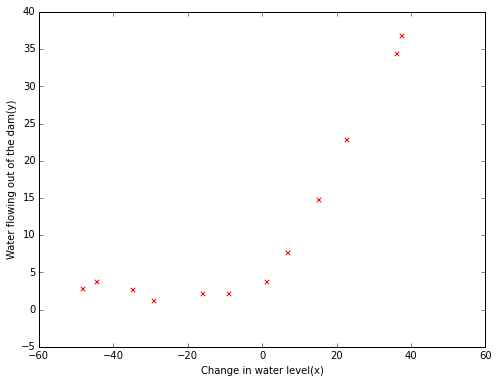

In [4]:
plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.scatter(data['X'], data['y'], c='r', marker='x')
plt.show()

#Learning curve for linear regression

In [5]:
from sklearn.learning_curve import learning_curve

In [6]:
def plot_learning_curve(estimator, title, X, y, Xval, yval, xlim=None, ylim=None):
    iterations = range(2, len(X))
    train_error = []
    val_error = []
    for i in iterations:
        estimator.fit(X[:i], y[:i])
        train_error.append(100* (1 - estimator.score(X[:i], y[:i])))
        val_error.append(100 * (1- estimator.score(Xval, yval)))

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.plot(iterations, train_error, label="Train")
    plt.plot(iterations, val_error, label="Cross Validation")
    plt.ylabel('Error (%)')
    plt.xlabel('Number of training examples')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    return plt

In [7]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge

In [8]:
clf = LinearRegression()
clf.fit(data['X'], data['y'])

print clf.coef_
print clf.intercept_

[[ 0.36777923]]
[ 13.08790351]


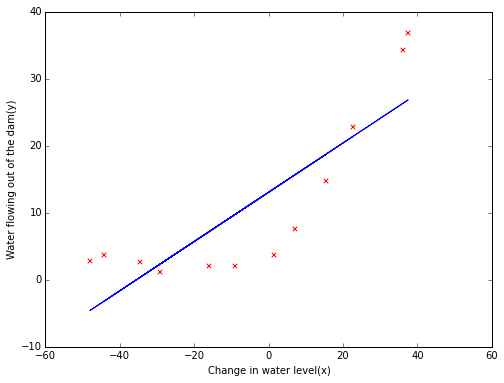

In [9]:
plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.scatter(data['X'], data['y'], c='r', marker='x')
plt.plot(data['X'], clf.predict(data['X']))
plt.show()

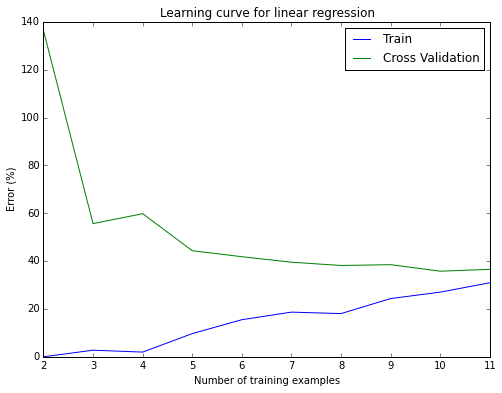

In [10]:
plot_learning_curve(clf, 'Learning curve for linear regression', data['X'], data['y'], data['Xval'], data['yval']).show()

#Polynomial Regression Learning Curve

##$\lambda = 0$

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf2 = Pipeline([('poly', PolynomialFeatures(degree=6)),
                 ('zscore', StandardScaler()),
                 ('linear', Ridge(alpha=0.0))])
clf2.fit(data['X'], data['y'])

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)), ('zscore', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001))])

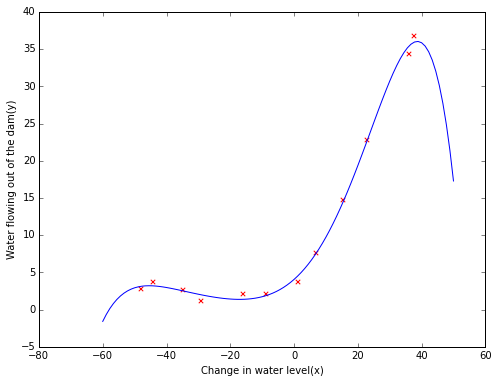

In [12]:
plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.scatter(data['X'], data['y'], c='r', marker='x')
xx = np.linspace(-60, 50, 100)[:, np.newaxis]
plt.plot(xx, clf2.predict(xx))
plt.show()

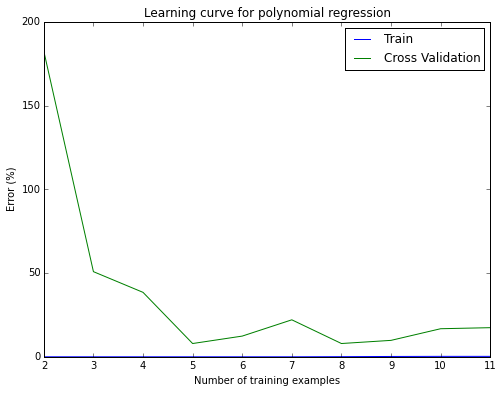

In [13]:
plot_learning_curve(clf2, 'Learning curve for polynomial regression', data['X'], data['y'], data['Xval'], data['yval']).show()

##$\lambda = 1$

In [14]:
clf3 = Pipeline([('poly', PolynomialFeatures(degree=6)),
                 ('zscore', StandardScaler()),
                 ('linear', Ridge(alpha=1))])
clf3.fit(data['X'], data['y'])

print clf3.named_steps['linear'].coef_

[[ 0.          8.38063402  5.21896919  3.62617237  2.11039464  1.95472334
   0.78519225]]


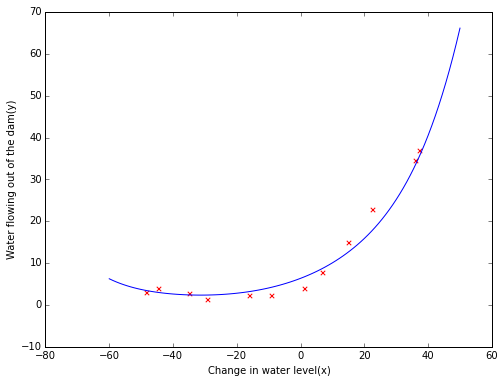

In [15]:
plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.scatter(data['X'], data['y'], c='r', marker='x')
xx = np.linspace(-60, 50, 100)[:, np.newaxis]
plt.plot(xx, clf3.predict(xx))
plt.show()

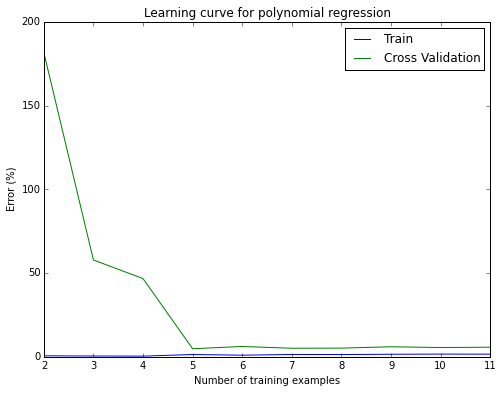

In [16]:
plot_learning_curve(clf3, 'Learning curve for polynomial regression', data['X'], data['y'], data['Xval'], data['yval']).show()

##$\lambda = 100$

In [17]:
clf4 = Pipeline([('poly', PolynomialFeatures(degree=6)),
                 ('zscore', StandardScaler()),
                 ('linear', Ridge(alpha=100))])
clf4.fit(data['X'], data['y'])

print clf4.named_steps['linear'].coef_

[[ 0.          1.01732905  0.31721843  0.79898768  0.12629107  0.60325488
  -0.00502064]]


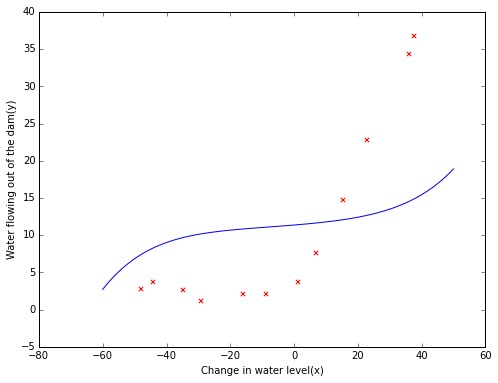

In [18]:
plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.scatter(data['X'], data['y'], c='r', marker='x')
xx = np.linspace(-60, 50, 100)[:, np.newaxis]
plt.plot(xx, clf4.predict(xx))
plt.show()

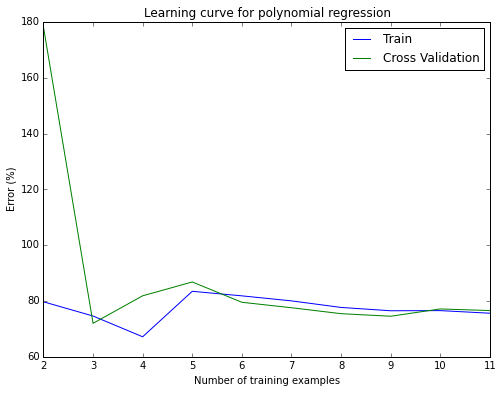

In [19]:
plot_learning_curve(clf4, 'Learning curve for polynomial regression', data['X'], data['y'], data['Xval'], data['yval']).show()